# Retrieval-Augmented Few-shot Skull Stripping

This notebook shows how model predicts the brain mask.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
from processor import processor

# Load Model
from model.RAFS import RAFS

model = RAFS(faiss_index='BME_Capstone1/BME_faiss.index',
             faiss_json='BME_Capstone1/faiss_idx.json',
             n=8)

Using cache found in /home/kdh/.cache/torch/hub/facebookresearch_dinov2_main


In [9]:
# We will use 90-th axial slice of some data.
mri = nib.load('BME_Capstone1/data/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w.nii.gz').get_fdata()
target_mri = mri[:, 90, :]
msk = nib.load('BME_Capstone1/data/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w_brainmask.nii.gz').get_fdata()
target_msk = msk[:, 90, :]

In [16]:
# Predict Mask
mask, mask_logit = model(target_mri.astype(np.float32))  # mask: [B, 1, H, W]

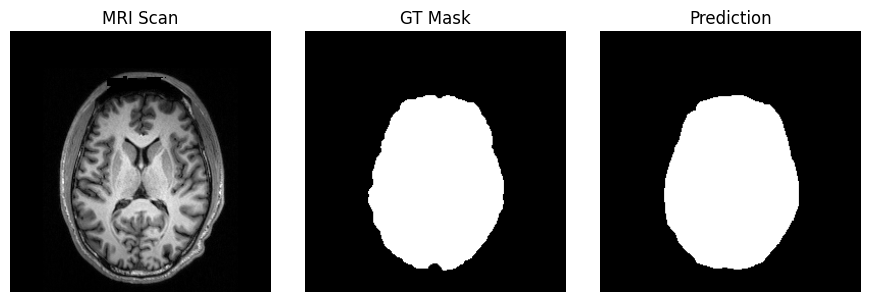

In [17]:
# Show GT / Prediction
plt.figure(dpi=100, figsize=(9, 3))

plt.subplot(1, 3, 1)
plt.imshow(processor(target_mri, mode='sam').permute(1, 2, 0))
plt.title('MRI Scan')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(processor(target_msk, mode='mask').permute(1, 2, 0), cmap='gray')
plt.title('GT Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(processor(mask[0], mode='mask').permute(1, 2, 0), cmap='gray')
plt.title('Prediction')
plt.axis('off')

plt.tight_layout()

In [24]:
mask.sum()

17797

In [28]:
# Dice Score
GT = target_msk.sum()
pred = mask.sum()
intersection = (processor(target_msk, mode='mask') * mask[0]).sum()

dice_score = (2. * intersection) / (GT + pred)

print(f"Dice Score: {dice_score}")

Dice Score: 0.9882963422544347
